1. Dự đoán điểm đọc dựa trên điểm viết
- Dataset: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

Input: midterm

Output: final

Tasks:
- Phân tích mối quan hệ giữa 2 điểm
- Xây dựng mô hình dự đoán
- Đánh giá độ chính xác

In [234]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [235]:
df = pd.read_csv("StudentsPerformance.csv")
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [236]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


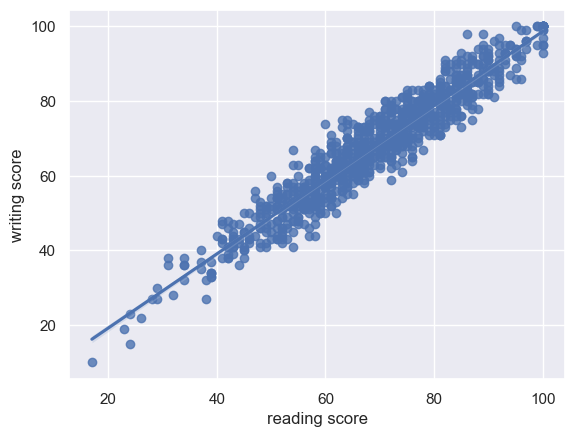

In [237]:
data=df[["reading score", "writing score"]]
ax=sns.regplot(x='reading score',y='writing score',data=data)
plt.show()

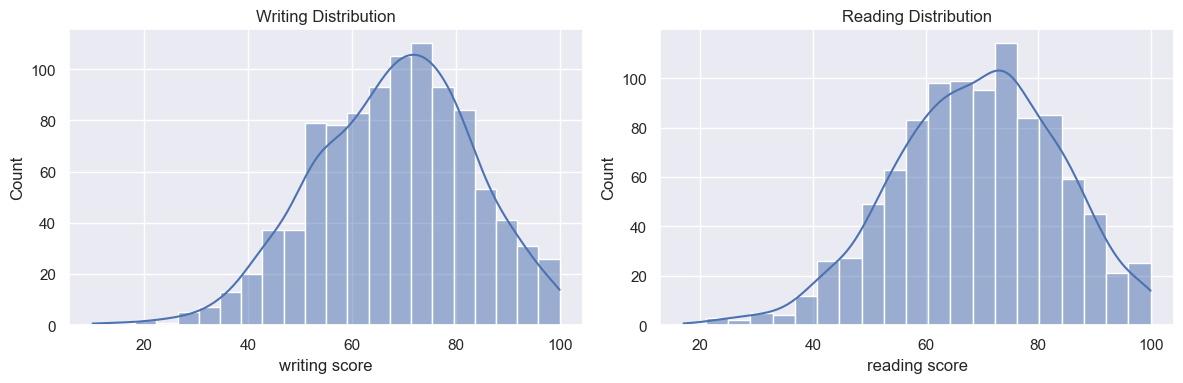

In [238]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
sns.histplot(data['writing score'], kde= True)
plt.title("Writing Distribution")

plt.subplot(122)
sns.histplot(data['reading score'], kde= True)
plt.title("Reading Distribution")

plt.tight_layout()
plt.show()


In [239]:
X = data['writing score'].values.reshape(-1,1)
y = data['reading score'].values

In [240]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [241]:
y_pred = model.predict(X_test)

print(f"Kết quả mô hình:")
print(f"R2 Score: {r2_score(y_test,y_pred):.4f}")
print(f"RMSE: {mean_squared_error(y_test,y_pred, squared= False):.4f}")

Kết quả mô hình:
R2 Score: 0.9203
RMSE: 4.2245


c:\Users\duclp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


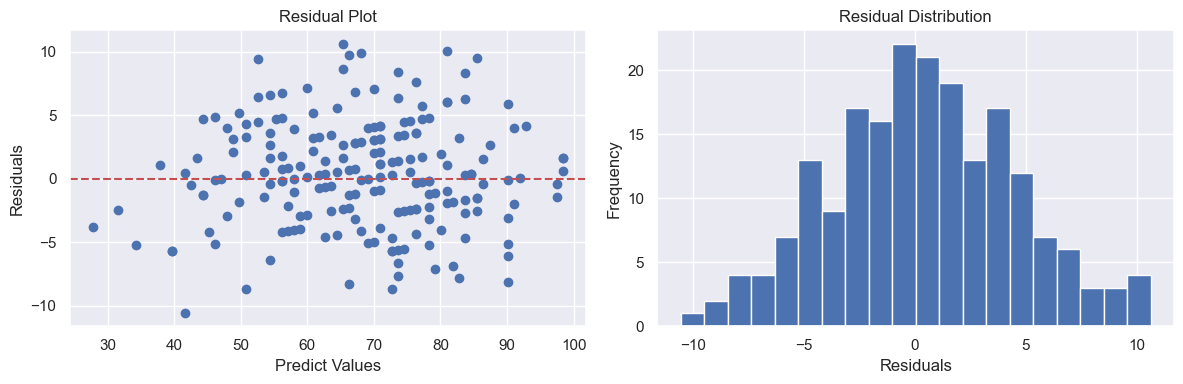

In [242]:
# Trực quan hóa lên kết quả 
residuals = y_test - y_pred

plt.figure(figsize=(12,4))
# Residual plot
plt.subplot(121)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predict Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

#Histogram
plt.subplot(122)
plt.hist(residuals, bins=20)
plt.ylabel('Frequency')
plt.xlabel('Residuals')
plt.title('Residual Distribution')

plt.tight_layout()
plt.show()